# Author: Midrar Adham
## Corner Reliability & project Proposal

In [10]:
import os
import random
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Select a set of 5-10 images. Convert them to grayscale and show them**
---

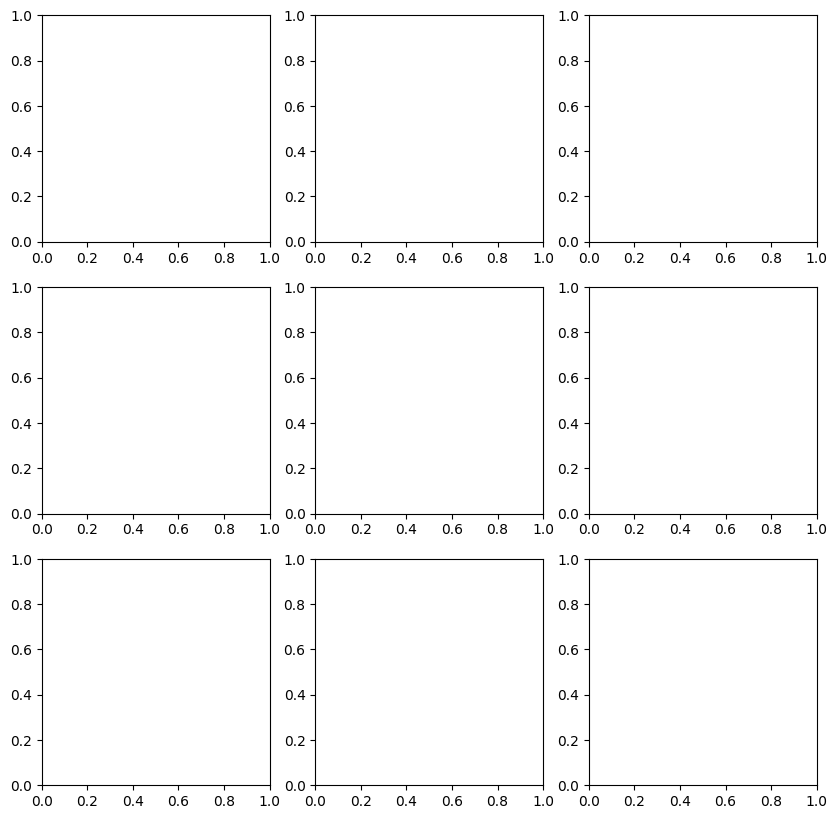

In [21]:
dir = '../../sample_data/hw6_images_2/'
images = os.listdir(dir)
def show_img(x,y, img, title):
    ax[x,y].imshow(img, cmap='gray')
    ax[x,y].set_title(title)

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(len(images)):
    img = cv.imread(dir + images[i], cv.IMREAD_GRAYSCALE)
    show_img(i//3, i%3, img, images[i])

**Develop a means of transforming images using a perspective transform such that if the image were taken 5 meters away, the transformed image is taken with an equivalent of a camera location that has changed position according to a 3D gaussian distribution with a standard deviation of 1 meter and has changed its orientation by rotation along a random axis by an angle randomly chosen from a uniform distribution ranging from 0 to 10 degrees. Also randomly alter the scale of the image intensity with a uniform distribution of 0.95 to 1.05 and the brightness by -0.10 to 0.10. Show a selection of 10 examples of randomly selected images before and after the transform.**
---

# **Remove the following paragraph before submission**
What I understood from this question and the class explaination is the following:

- Change each image position according to a 3D gaussian distribution with:
    - One meter standard deviation.
    - Image is rotated by a random angle that ranges from 0 to 10 degrees.
- Change the image intensity with a uniform distribution ranging from 0.95 to 1.05.
- Change the image brightness with a uniform distribution ranging from -0.10 to 0.10.

The aforementioned requirements are applied step by a step as follows:

The perspective Transform is a 3x3 matrix and can be expressed as follows:

$$
M = 
\begin{equation*}
\begin{bmatrix}
f_{x} & 0 & t_{x}\\
0 & f_{y} & t_{y}\\
0 & 0 & 1
\end{bmatrix}
\end{equation*}
$$

where:
- $f_{x}$ and $f_{y}$ are the scaling factors.
- $t_{x}$ and $t_{y}$ are the translation vectors.

My main problem with implementing an automated way to calculate the size of the transformed image was the size. A wrong size of the output image returns a black image or the original image.

41.10875427945005


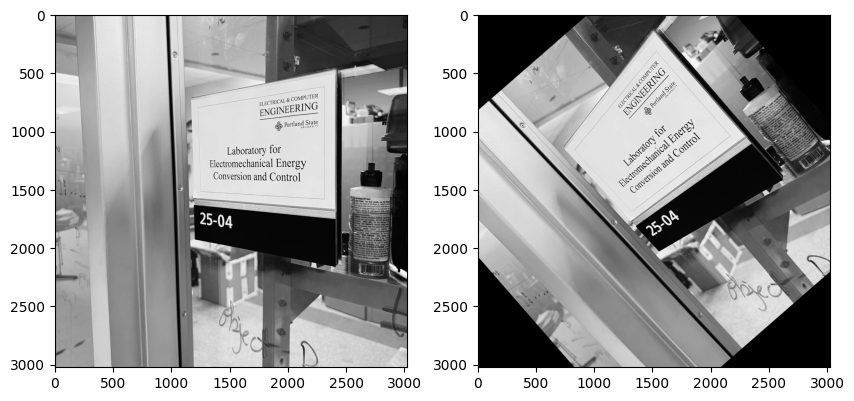

In [107]:
img = cv.imread(dir + 'label.jpg', cv.IMREAD_GRAYSCALE)

src_pts = np.float32([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]],
                      [0, img.shape[0]]])

dst_pts = np.float32([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]],
                      [0, img.shape[0]]])

std_dev = 1
angle = random.uniform(a=0,b=10)
rotation_matrix = cv.getRotationMatrix2D(center = (img.shape[1] / 2, img.shape[0] / 2), angle=angle, scale=1)
rotation_matrix = np.vstack((rotation_matrix, [0, 0, 1]))
position = np.random.normal(scale=std_dev, size=2)
position = np.array(position, dtype=np.float32)

img_t = cv.warpPerspective(img, rotation_matrix, (img.shape[1], img.shape[0]))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_t, cmap='gray')

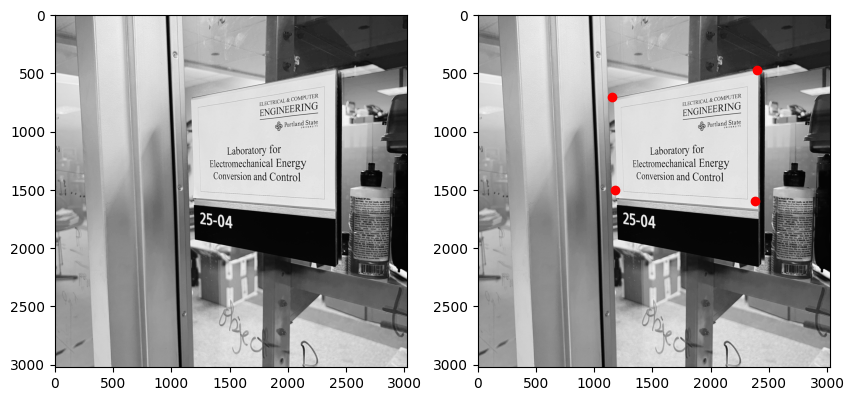

In [102]:
img = cv.imread(dir + 'label.jpg', cv.IMREAD_GRAYSCALE)

src_pts = np.array([[1150,700],[2400,470],[1180,1500],[2380,1600]], dtype=np.float32)
n_img = cv.normalize(img.copy(), None, 0, 255, cv.NORM_MINMAX)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
# ax[1].imshow(n_img, cmap='gray')
ax[1].scatter(src_pts[:, 0],src_pts[:, 1], color='red', marker='o', linestyle='-', linewidth=1)
ax[1].imshow(img, cmap='gray')

[[ 9.91384326e-01  1.30985183e-01 -1.85022697e+02]
 [-1.30985183e-01  9.91384326e-01  2.11076495e+02]
 [-1.38073046e-04 -2.79041499e-05  1.00000000e+00]]


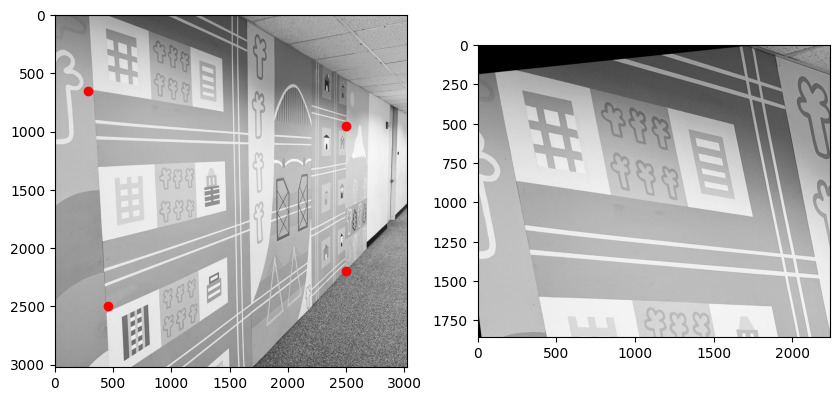

In [63]:
std_dev = 1
rotation_range = 10
intensity_scale_range = (0.95, 1.05)
brightness_range = (-0.10, 0.10)
position = np.array(np.random.normal(scale=std_dev, size=2), dtype=np.float32)


tls = (280,650) # x,y
bls = (460,2500)
trs = (2500, 950)
brs = (2500, 2200)

def alter_img_settings(img, matrix):
    std_dev = 1
    intensity_scale_range = (0.95, 1.05)
    brightness_range = (-0.10, 0.10)
    
    angle = random.uniform(a=0,b=10)
    position = np.random.normal(scale=std_dev, size=2)
    position = np.array(position, dtype=np.float32)
    
    # Alter the camera position by manipulating the translation vectors
    matrix[:2, 2] += position
    
    # Alter the orientation of the output image by adjusting the rotation matrix
    rotation_matrix = cv.getRotationMatrix2D(center = (img.shape[1] / 2, img.shape[0] / 2), angle=angle, scale=1)
    matrix[:2, :] = rotation_matrix
    print(matrix)
    
    
    return matrix

def four_point_transform(image, pts):
    (tl, tr, br, bl) = pts
    
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    
    M = cv.getPerspectiveTransform(pts, dst)
    M = alter_img_settings(img=image, matrix=M)
    # M[:2, :] = matrix[:2, :]  # replace the rotation matrix elements with the elements in the matrix variable
    warped = cv.warpPerspective(image, M, (maxWidth, maxHeight))
    # warped = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))
    return warped

img = cv.imread(dir + 'painting.jpg', cv.IMREAD_GRAYSCALE)
src_pts = np.array([[tls[0], tls[1]],
                    [trs[0], trs[1]],
                    [brs[0], brs[1]],
                    [bls[0], bls[1]]],
                   dtype=np.float32)
warped = four_point_transform(img, src_pts)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].scatter(src_pts[:, 0],src_pts[:, 1], color='red', marker='o', linestyle='-', linewidth=1)
ax[1].imshow(warped, cmap='gray')

In [31]:
# # Define transformation parameters
# std_dev = 1
# rotation_range = 10
# intensity_scale_range = (0.95, 1.05)
# brightness_range = (-0.10, 0.10)

# images_dict = {'frame':290,'label':100,'book':50,'grid':20,'painting':250}
# img = cv.imread(dir + 'painting' + '.jpg', cv.IMREAD_GRAYSCALE)

# # src pts
# tls = (280,650) # x,y
# bls = (460,2500)
# trs = (2500, 950)
# brs = (2500, 2200)

# src_pts = np.array([[tls[0], tls[1]],
#                     [trs[0], trs[1]],
#                     [brs[0], brs[1]],
#                     [bls[0], bls[1]]],
#                    dtype=np.float32)

# position = np.random.normal(scale=std_dev, size=2)
# position = np.array(position, dtype=np.float32)
# dst_pts = src_pts + position
# x_min = int(np.min(dst_pts[:, 0]))
# x_max = int(np.max(dst_pts[:, 0]))
# y_min = int(np.min(dst_pts[:, 1]))
# y_max = int(np.max(dst_pts[:, 1]))

# width = x_max - x_min
# height = y_max - y_min


# M = cv.getPerspectiveTransform(src_pts, dst_pts)
# img_transformed = cv.warpPerspective(src=img, M=M, dsize=(width, height))

# fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# ax[0].imshow(img, cmap='gray')
# ax[0].scatter(src_pts[:, 0],src_pts[:, 1], color='red', marker='o', linestyle='-', linewidth=1)
# ax[1].imshow(img_transformed, cmap='gray')


# # # src pts
# # tls = (280,650) # x,y
# # bls = (460,2500)
# # trs = (2500, 950)
# # brs = (2500, 2200)

# # tld = (0,0) # x,y
# # bld = (600,0)
# # trd = (0, 1000)
# # brd = (600, 1000)

# # src_pts = np.array([[tls[0], tls[1]],
# #                     [trs[0], trs[1]],
# #                     [brs[0], brs[1]],
# #                     [bls[0], bls[1]]],
# #                    dtype=np.float32)

# # dst_pts = np.array([[tld[0],tld[1]],
# #                     [trd[0],trd[1]],
# #                     [brd[0], brd[1]],
# #                     [bld[0], bld[1]]],
# #                    dtype=np.float32)

# # # simulating a camera position from a 3D world so we get an x,y, and z. I won't use the Z because the final image is in 2D.
# # # position = np.random.normal(scale=std_dev, size=3)
# # # position = np.array(position[:2], dtype=np.float32)
# # # dst_pts = src_pts + position

# # # dst_pts[:, 0] = np.clip(dst_pts[:, 0], 0, img.shape[1] - 1)
# # # dst_pts[:, 1] = np.clip(dst_pts[:, 1], 0, img.shape[0] - 1)

# # M = cv.getPerspectiveTransform(src_pts, dst_pts)
# # print(M)
# # T_img = cv.warpPerspective(img, M, (600, 1000))
# # T_img = T_img.transpose()

# # fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# # ax[0].imshow(img, cmap='gray')
# # ax[0].scatter(src_pts[:, 0],src_pts[:, 1], color='red', marker='o', linestyle='-', linewidth=1)
# # ax[1].imshow(T_img, cmap='gray')

In [32]:
# # Define transformation parameters
# std_dev = 1
# rotation_range = 10
# intensity_scale_range = (0.95, 1.05)
# brightness_range = (-0.10, 0.10)

# images_dict = {'frame':290,'label':100,'book':50,'grid':20,'painting':250}
# img = cv.imread(dir + 'painting' + '.jpg', cv.IMREAD_GRAYSCALE)

# # src pts
# tls = (280,650) # x,y
# bls = (460,2500)
# trs = (2500, 950)
# brs = (2500, 2200)

# tld = (0,0) # x,y
# bld = (600,0)
# trd = (0, 1000)
# brd = (600, 1000)

# src_pts = np.array([[tls[0], tls[1]],
#                     [trs[0], trs[1]],
#                     [brs[0], brs[1]],
#                     [bls[0], bls[1]]],
#                    dtype=np.float32)

# dst_pts = np.array([[tld[0],tld[1]],
#                     [trd[0],trd[1]],
#                     [brd[0], brd[1]],
#                     [bld[0], bld[1]]],
#                    dtype=np.float32)

# M = cv.getPerspectiveTransform(src_pts, dst_pts)
# print(M)
# T_img = cv.warpPerspective(img, M, (600, 1000))
# T_img = T_img.transpose()

# fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# ax[0].imshow(img, cmap='gray')
# ax[0].scatter(src_pts[:, 0],src_pts[:, 1], color='red', marker='o', linestyle='-', linewidth=1)
# ax[1].imshow(T_img, cmap='gray')

In [33]:
# # Work on one image initially:
# img = 'frame.jpg'
# img = cv.imread(dir + img, cv.IMREAD_GRAYSCALE)
# def img_settings ():
#     # position settings:
#     # loc = mean, scale = std deviation. x,y, and z are the camera 3D coordinates
#     x,y,z = np.random.normal(loc=0,scale=1,size=3)
#     # angle rotation
#     angle = random.uniform(a=0,b=10)
#     axis = np.random.randn(3)
#     # Image intensity settings:
#     alpha = random.uniform(a=0.95,b=1.05)
#     beta = random.uniform(a=-0.10,b=0.10)
    
#     return x,y,z,angle,axis,alpha,beta

# def apply_settings (img, x, y, angle, axis, alpha, beta):
#     # Get rotation matrix:
#     rotation_matrix = cv.Rodrigues(angle * axis)[0]
#     # Initialize perspective transformation matrix:
#     perpsective_matrix = np.float32([[alpha, 0, 0],
#                                   [0, alpha, 0],
#                                   [beta, beta, 1]]
#                                  )
#     transformed_image = cv.warpPerspective(img, perpsective_matrix, (img.shape[1], img.shape[0]))
#     transform_matrix = np.zeros((2,3))
#     transform_matrix[:,:2] = rotation_matrix[:2,:2]
#     transform_matrix[:,2] = [x,y]
#     # Initialize position settings:
#     # transformed_image = cv.resize(transformed_image, (img.shape[1] + int(x), img.shape[0] + int(y)))
#     # transformed_image = cv.warpAffine(src = transformed_image, M = np.float32([[1, 0, x], [0, 1, y]]), dsize=(img.shape[1], img.shape[0]))
#     # Initialize orientation settings:
#     # The wrappAffine takes a 2x2 rotation matrix, or M. 
#     transformed_image = cv.warpAffine(src=transformed_image, M=transform_matrix, dsize=(img.shape[1], img.shape[0]))
    
#     return transformed_image



# x,y,z,angle,axis, alpha,beta = img_settings()
# x = apply_settings(img, x, y, angle, axis, alpha, beta)
# plt.imshow(x, cmap='gray')
    
    